In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 10 20:38:57 2021

@author: GERMANBARCENAS
"""

#%% Modules
import re
import sys 
import os
import inspect
print(sys.path)
#sys.path.insert(1,'C:\Users\GermanBarcenas\Anaconda3\envs\smiTogjf\Lib\site-packages')
#print(inspect.getfile())
#cwd=os.getcwd()
#print(cwd)
#os.chdir(cwd)
import pandas as pd
import rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDistGeom as molDG
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import AllChem
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')
from rdkit.Chem import rdAbbreviations
from rdkit.Chem import rdmolops
import openbabel
from openbabel import openbabel as ob
from matplotlib.colors import ColorConverter
rdDepictor.SetPreferCoordGen(True)
from IPython.display import SVG



['C:\\projects\\moleculeScreening', 'C:\\Users\\GermanBarcenas\\Anaconda3\\python39.zip', 'C:\\Users\\GermanBarcenas\\Anaconda3\\DLLs', 'C:\\Users\\GermanBarcenas\\Anaconda3\\lib', 'C:\\Users\\GermanBarcenas\\Anaconda3', '', 'C:\\Users\\GermanBarcenas\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\GermanBarcenas\\Anaconda3\\lib\\site-packages', 'C:\\Users\\GermanBarcenas\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\GermanBarcenas\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\GermanBarcenas\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\GermanBarcenas\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\GermanBarcenas\\.ipython']


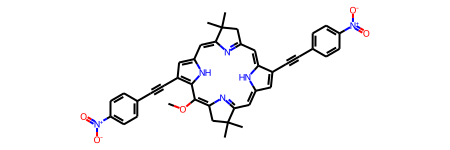

In [3]:
#%% Read SMILES Input and name
dyeName='bc-3b'
smiles={
        'bisr1-o2':'O=c6c(c5ccc(N4CCN(c3ccc(c2c([O-])c(=c1ccc(=N(=O)[O-])cc1)c2=O)cc3)CC4)cc5)c([O-])c6=C7C=CC(N([O-])[O-])C=C7',
        'bisr1-h': '[NH2+]=c7ccc(=c6c([O-])c(c5ccc(N4CCN(c3ccc(c2c([O-])c(=c1ccc(=[NH2+])cc1)c2=O)cc3)CC4)cc5)c6=O)cc7',
        'bissq1-cl': 'CN9/C(=C/c7c([O-])c(=CC2=[N+](C)c1cc6c(cc1C2(C)C)[N+](C)=C(C=c5c([O-])c(/C=C/4N(C)c3ccc(Cl)cc3C4(C)C)c5=O)C6(C)C)c7=O)C(C)(C)c8cc(Cl)ccc89',
        'bissq1-h' : 'CN9/C(=C/c7c([O-])c(=CC2=[N+](C)c1cc6c(cc1C2(C)C)[N+](C)=C(C=c5c([O-])c(/C=C/4N(C)c3ccccc3C4(C)C)c5=O)C6(C)C)c7=O)C(C)(C)c8ccccc89',
        'bissq4' : 'CN%11/C(=C\c9c([O-])c(=CC2=[N+](CCCCS(=O)(=O)O)c1cc4c(cc1C2(C)C)C(C)(C)c3cc8c(cc3C4(C)C)C(C)(C)C(C=c7c([O-])c(/C=C/6N(C)c5ccccc5C6(C)C)c7=O)=[N+]8CCCCS(=O)(=O)O)c9=O)C(C)(C)c%10ccccc%10%11',
        'r-f' : 'O=C2NCc5c(F)c(F)c(CNC(=O)c1cccc(n1)C(=O)NCc4c(F)c(F)c(CNC(=O)c3cccc2n3)c(F)c4F)c(F)c5F',
        'sr16' : 'C[N+]5=C(C=c3c([O-])c(C=C2Nc1ccc(Cl)cc1C2(C)C)c3=O)C(C)(C)c4cc(Cl)ccc45',
        'sr30' : 'C[N+]5=C(C=c3c([O-])c(C=C2Nc1ccc(S(=O)(=O)O)cc1C2(C)C)c3=O)C(C)(C)c4cc(S(=O)(=O)O)ccc45',
        'sr31' : 'C[N+]5=C(C=c3c([O-])c(C=C2Nc1ccc(S(N)(=O)=O)cc1C2(C)C)c3=O)C(C)(C)c4cc(Cl)ccc45',
        'sr32' : 'C[N+]5=C(C=c3c([O-])c(C=C2Nc1ccc(S(N)(=O)=O)cc1C2(C)C)c3=O)C(C)(C)c4cc(S(N)(=O)=O)ccc45',
        'chlorin' : 'C1CC2=NC1=CC3=CC=C(N3)C=C4C=CC(=N4)C=C5C=CC(=C2)N5',
        'bis-bc-3' : 'COc%10c%14C=[C+](C)(C)c(cc%13cc(C#Cc1ccc(N(=O)=O)cc1)c(cc%12C=[C+](C)(C)c(cc%11cc(C#C[C@@]89C[C@@](C#Cc6cc7cc2nc(C=[C+]2(C)C)cc3[nH]c(cc3C#Cc4ccc(N(=O)=O)cc4)cc5nc(C=[C+]5(C)C)c(OC)c6[nH]7)(C8)C9)c%10[nH]%11)n%12)[nH]%13)n%14',
        'chlorin-meso' : 'C1CC2=NC1=C([*:1])C3=CC=C(N3)C([*:2])=C4C=CC(=N4)C([*:3])=C5C=CC(=C2([*:4]))N5',
        'chlorin-meta' : 'C1([*:6])C([*:5])C2=NC1=CC3=C([*:7])C([*:8])=C(N3)C=C4C([*:9])=C([*:10])C(=N4)C=C5C([*:11])=C([*:12])C(=C2)N5',
        'chlorin-all' : 'C1([*:6])C([*:5])C2=NC1=C([*:1])C3=C([*:7])C([*:8])=C(N3)C([*:2])=C4C([*:9])=C([*:10])C(=N4)C([*:3])=C5C([*:11])=C([*:12])C(=C2([*:4]))N5',
        'ciprofloxacin' : 'C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O',
        'cy5' : 'CN4/C(=C/C=C/C=C/C2=[N+](C)c1ccccc1C2(C)C)C(C)(C)c3ccccc34',
        'sq' : 'CN5/C(=C/c3c([O-])c(=CC2=[N+](C)c1ccccc1C2(C)C)c3=O)C(C)(C)c4ccccc45',
        'sq-SO' : 'CN5/C(=C/c3c([S-])c(=CC2=[N+](C)c1ccccc1C2(C)C)c3=O)C(C)(C)c4ccccc45',
        'sq-test' : 'CN5/C(=C/c3c([*:1])c(=CC2=[N+](C)c1ccccc1C2(C)C)c3=[*:1])C(C)(C)c4ccccc45',
        'sq-thio' : 'CN5/C(=C/c3c([S-])c(=CC2=[N+](C)c1ccccc1C2(C)C)c3=S)C(C)(C)c4ccccc45',
        'sq-se' : 'CN5/C(=C/c3c([Se-])c(=CC2=[N+](C)c1ccccc1C2(C)C)c3=[Se])C(C)(C)c4ccccc45',
        'sq-te' : 'CN5/C(=C/c3c([Te-])c(=CC2=[N+](C)c1ccccc1C2(C)C)c3=[Te])C(C)(C)c4ccccc45',
        'sq-nme2' : 'CN(C)c1ccc5c(c1)N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2ccccc2C3(C)C)c4=O)C5(C)C',
        'sq-nme2-linkera' : 'CC(=O)NCCCCCCNC(=O)CCCCCN5/C(=C\c3c([O-])c(=CC2=[N+](C)c1ccc(N(C)C)cc1C2(C)C)c3=O)C(C)(C)c4ccccc45',
        'sq-nme2-linkerb' : 'CC(=O)NCCCCCCNC(=O)CCCCCN5/C(=C\c3c([O-])c(=CC2=[N+](C)c1ccccc1C2(C)C)c3=O)C(C)(C)c4cc(N(C)C)ccc45',
        'sq-no2-nme2' : 'CN(C)c1ccc5c(c1)N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2ccc(N(=O)=O)cc2C3(C)C)c4=O)C5(C)C',
        'sqSS' : 'Cn5c(=Cc3c([O-])c(=Cc2sc1ccccc1[n+]2C)c3=O)sc4ccccc45',
        'sqSSe' : 'Cn5c(=Cc3c([O-])c(=Cc2sc1ccccc1[n+]2C)c3=O)[se]c4ccccc45',
        'sqSeSe' : 'Cn5c(=Cc3c([O-])c(=Cc2[se]c1ccccc1[n+]2C)c3=O)[se]c4ccccc45',
        'sqSe' : 'Cn5c(=Cc3c([O-])c(=CC2=[N+](C)c1ccccc1C2(C)C)c3=O)[se]c4ccccc45',
        'sqS' : 'Cn5c(=Cc3c([O-])c(=CC2=[N+](C)c1ccccc1C2(C)C)c3=O)sc4ccccc45',
        'bchl' : 'c1cc2cc5CCc(cc4ccc(cc3CCc(cc1[nH]2)n3)[nH]4)n5',
        'bis-bc-1A' : 'C#Cc2cc3cc1nc(CC1(C)C)c(OC)c5[nH]c(cc4nc(cc2[nH]3)CC4(C)C)cc5c6ccc7c(c6)C(C)(C)CC7%14CC(C)(C)c%13cc(c%10cc%11cc%12nc(cc8[nH]c(cc8C#C)cc9nc(CC9(C)C)c(OC)c%10[nH]%11)CC%12(C)C)ccc%13%14',
        'bis-bc-1B' : 'C#Cc2cc3cc%14nc(cc4[nH]c(cc1nc(CC1(C)C)c(OC)c2[nH]3)cc4c5ccc6c(c5)C(C)(C)CC6%13CC(C)(C)c%12cc(c9cc%10cc7nc(CC7(C)C)c(OC)c8[nH]c(cc8C#C)cc%11nc(cc9[nH]%10)CC%11(C)C)ccc%12%13)CC%14(C)C',
        'bis-bc-2' : 'C#Cc%10cc%11cc1nc(CC1(C)C)c(OC)c2[nH]c(cc2C#CC89CC(C#Cc5cc6cc7nc(cc3[nH]c(cc3C#C)cc4nc(CC4(C)C)c(OC)c5[nH]6)CC7(C)C)(C8)C9)cc%12nc(cc%10[nH]%11)CC%12(C)C',
        'bchl-all' : 'c1([*:1])c([*:2])c2c([*:3])c5C([*:4])C([*:5])c(c([*:6])c4c([*:7])c([*:8])c(c([*:9])c3C([*:10])C([*:11])c(c([*:12])c1[nH]2)n3)[nH]4)n5',
        'bc-3b' : 'COc3c7CC(C)(C)c(cc6cc(C#Cc1ccc(N(=O)=O)cc1)c(cc5CC(C)(C)c(cc4cc(C#Cc2ccc(N(=O)=O)cc2)c3[nH]4)n5)[nH]6)n7',
        'bc-20230111' : '',
        'sq-2br-2^ome' : 'COc1cccc5c1N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2c(Br)cccc2C3(C)C)c4=O)C5(C)C',
        'sq-2br-3^ome' : 'COc1ccc5c(c1)N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2c(Br)cccc2C3(C)C)c4=O)C5(C)C',
        'sq-2br-4^ome' : 'COc1ccc5c(c1)C(C)(C)/C(=C\c4c([O-])c(=CC3=[N+](C)c2c(Br)cccc2C3(C)C)c4=O)N5C',
        'sq-3br-2^ome' : 'COc1cccc5c1N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2cc(Br)ccc2C3(C)C)c4=O)C5(C)C',
        'sq-3br-3^ome' : 'COc1ccc5c(c1)N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2cc(Br)ccc2C3(C)C)c4=O)C5(C)C',
        'sq-3br-4^ome' : 'COc1ccc5c(c1)C(C)(C)/C(=C\c4c([O-])c(=CC3=[N+](C)c2cc(Br)ccc2C3(C)C)c4=O)N5C',
        'sq-4br-2^ome' : 'COc1cccc5c1N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2ccc(Br)cc2C3(C)C)c4=O)C5(C)C',
        'sq-4br-3^ome' : 'COc1ccc5c(c1)N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2ccc(Br)cc2C3(C)C)c4=O)C5(C)C',
        'sq-4br-4^ome' : 'COc1ccc5c(c1)C(C)(C)/C(=C\c4c([O-])c(=CC3=[N+](C)c2ccc(Br)cc2C3(C)C)c4=O)N5C',
        'sq-2cl-2^ome' : 'COc1cccc5c1N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2c(Cl)cccc2C3(C)C)c4=O)C5(C)C',
        'sq-2cl-3^ome' : 'COc1ccc5c(c1)N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2c(Cl)cccc2C3(C)C)c4=O)C5(C)C',
        'sq-2cl-4^ome' : 'COc1ccc5c(c1)C(C)(C)/C(=C\c4c([O-])c(=CC3=[N+](C)c2c(Cl)cccc2C3(C)C)c4=O)N5C',
        'sq-3cl-2^ome' : 'COc1cccc5c1N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2cc(Cl)ccc2C3(C)C)c4=O)C5(C)C',
        'sq-3cl-3^ome' : 'COc1ccc5c(c1)N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2cc(Cl)ccc2C3(C)C)c4=O)C5(C)C',
        'sq-3cl-4^ome' : 'COc1ccc5c(c1)C(C)(C)/C(=C\c4c([O-])c(=CC3=[N+](C)c2cc(Cl)ccc2C3(C)C)c4=O)N5C',
        'sq-4cl-2^ome' : 'COc1cccc5c1N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2ccc(Cl)cc2C3(C)C)c4=O)C5(C)C',
        'sq-4cl-3^ome' : 'COc1ccc5c(c1)N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2ccc(Cl)cc2C3(C)C)c4=O)C5(C)C',
        'sq-4cl-4^ome' : 'COc1ccc5c(c1)C(C)(C)/C(=C\c4c([O-])c(=CC3=[N+](C)c2ccc(Cl)cc2C3(C)C)c4=O)N5C',
        'sq-2cf3-2^ome' : 'COc1cccc5c1N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2c(C(F)(F)F)cccc2C3(C)C)c4=O)C5(C)C',
        'sq-2cf3-3^ome' : 'COc1ccc5c(c1)N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2c(C(F)(F)F)cccc2C3(C)C)c4=O)C5(C)C',
        'sq-2cf3-4^ome' : 'COc1ccc5c(c1)C(C)(C)/C(=C\c4c([O-])c(=CC3=[N+](C)c2c(C(F)(F)F)cccc2C3(C)C)c4=O)N5C',
        'sq-3cf3-2^ome' : 'COc1cccc5c1N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2cc(C(F)(F)F)ccc2C3(C)C)c4=O)C5(C)C',
        'sq-3cf3-3^ome' : 'COc1ccc5c(c1)N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2cc(C(F)(F)F)ccc2C3(C)C)c4=O)C5(C)C',
        'sq-3cf3-4^ome' : 'COc1ccc5c(c1)C(C)(C)/C(=C\c4c([O-])c(=CC3=[N+](C)c2cc(C(F)(F)F)ccc2C3(C)C)c4=O)N5C',
        'sq-4cf3-2^ome' : 'COc1cccc5c1N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2ccc(C(F)(F)F)cc2C3(C)C)c4=O)C5(C)C',
        'sq-4cf3-3^ome' : 'COc1ccc5c(c1)N(C)/C(=C/c4c([O-])c(=CC3=[N+](C)c2ccc(C(F)(F)F)cc2C3(C)C)c4=O)C5(C)C',
        'sq-4cf3-4^ome' : 'COc1ccc5c(c1)C(C)(C)/C(=C\c4c([O-])c(=CC3=[N+](C)c2ccc(C(F)(F)F)cc2C3(C)C)c4=O)N5C',
        'cyclohexane' : 'C1CCCCC1'
        }


smiles_INPUT=smiles[dyeName]

molecule=Chem.MolFromSmiles(smiles_INPUT)
rdDepictor.Compute2DCoords(molecule)

img = Draw.MolToImage(molecule)
img.save("%s.png" %dyeName)
molecule
#%% Save image files

In [3]:
#%% Create 3D .pdb from 2D SMILES
molecule_3d=Chem.AddHs(molecule)
AllChem.EmbedMolecule(molecule_3d)


# cids = AllChem.EmbedMultipleConfs(molecule_3d, numConfs=7)
# rmslist = []
# AllChem.AlignMolConformers(molecule_3d, RMSlist=rmslist)
# print(len(rmslist))
# rms = AllChem.GetConformerRMS(molecule_3d, 1, 6, prealigned=True)
# res = AllChem.MMFFOptimizeMoleculeConfs(molecule_3d)
# minimumConformer=min(res)
# minimumConformerIndex=res.index(minimumConformer)
# print(minimumConformerIndex)
# print(min(res))
# print(res)
# minimumConformerMol=molecule_3d.GetConformer(minimumConformerIndex)

# writer=Chem.SDWriter('out.sdf')
# for mol in res:
#     writer.write(mol)
# w = Chem.SDWriter(sys.stdout)
# for i in res:
#    ff = AllChem.MMFFGetMoleculeForceField(molecule_3d, confId = i)
#    ff.Minimize()
#    energy_value = ff.CalcEnergy()
#    mol.SetProp('ENERGY', '{0:.2f}'.format(energy_value))
#    w.write(mol, confId = i)
# w.close()

AllChem.MMFFOptimizeMolecule(molecule_3d)
molecule.SetProp('_Name',"%s.png" %dyeName)
Chem.MolToPDBFile(molecule_3d,'%s.pdb'%dyeName)

In [4]:
#%% Create .gjf from .pdb using OpenBabel
obConversion = ob.OBConversion()
obConversion.SetInAndOutFormats("pdb", "gjf")
obConversion.AddOption("b",obConversion.OUTOPTIONS) #Writes bond information out to .gjf
mol = ob.OBMol()
obConversion.ReadFile(mol,'%s.pdb' %dyeName)
obConversion.WriteFile(mol, '%s_gs_opt_m062x_vacuum.gjf' %dyeName)

True

In [5]:
#%% Write Gaussian Inputs into generated .gjf file
with open('%s_gs_opt_m062x_vacuum.gjf' %dyeName,'r') as file:
        data = file.readlines()
        data[0]='%%chk=%s_gs_opt_m062x_vacuum.chk\n'%dyeName
        data[1]='%nprocshared=48\n'
        data[2]='%mem=20GB\n'
        data[3]='# opt=tight m062x/6-31+g(d,p) density=current int=ultrafine geom=connectivity\n\n'
        data[4]='%s\n\n'%dyeName
        print(data[:5])
        data.append('')
        
with open('%s_gs_opt_m062x_vacuum.gjf' %dyeName, 'w') as file:
    file.writelines(data)
    

['%chk=cyclohexane_gs_opt_m062x_vacuum.chk\n', '%nprocshared=48\n', '%mem=20GB\n', '# opt=tight m062x/6-31+g(d,p) density=current int=ultrafine geom=connectivity\n\n', 'cyclohexane\n\n']
